In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from word2number import w2n

In [3]:
df = pd.read_csv('bank-marketing.csv')

In [4]:
df.head(10)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,100000,married,tertiary,yes,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,100000,single,tertiary,no,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,120000,divorced,tertiary,no,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,55000,married,primary,yes,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,60000,single,secondary,yes,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [6]:
# Drop column "contact" which is useless
df= df.drop('contact', axis =1)

In [7]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [8]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the feature?

In [9]:
print(df.pdays.describe())

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [10]:
df.shape

(45211, 18)

In [11]:
print(df.pdays.value_counts().head(1))

-1    36954
Name: pdays, dtype: int64



#### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [12]:
data_v = df[df.pdays != -1]

In [13]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### Huge difference between the values
#### Previously Mean was of 40 and median = -1 , now after limiting -1 values we have mean=224 and median = 194

In [14]:
#Drop customer values with other education
con = (df['education'] == 'other')
df = df.drop(df[con].index, axis = 0, inplace = False)

In [15]:
# Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

#### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [16]:
bedu=df.groupby(['education'])['balance'].median()
bedu

education
other        563.5
primary      398.0
secondary    387.0
tertiary     572.0
Name: balance, dtype: float64

Text(0.5, 1.0, 'Grouping Education based on balance')

<Figure size 720x288 with 0 Axes>

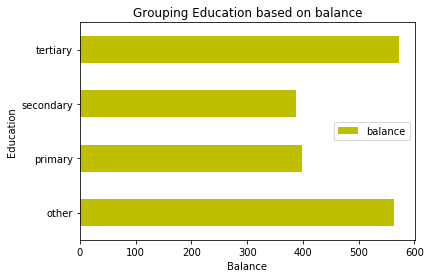

In [17]:
plt.figure(figsize=(10,4))
bardf=pd.DataFrame(bedu)
colors = ('y','y','y')
bardf.plot.barh(color=colors)
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance')

##### Make a box plot for pdays. Do you see any outliers?

Text(0.5, 1.0, 'Ouliers')


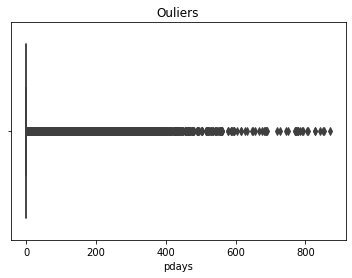

In [18]:
print(sns.boxplot(x=df['pdays']).set_title('Ouliers'))

Text(0.5, 1.0, 'Outliers')


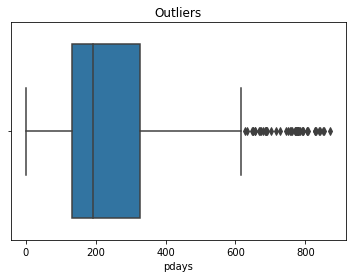

In [19]:
print(sns.boxplot(x=data_v['pdays']).set_title('Outliers'))


### Performing Exploratory Data Analysis

### Steps to be followed during exploratory data analysis
*VARIABLE IDENTIFICATION

*UNIVARIATE ANALYSIS

*BI-VARIATE ANALYSIS

*MISSING VALUES

*OUTLIERS

*VARIABLE TRANSFORMATION

*VARIABLE CREATION

# Variable identification



### Type of variable

# Univariate Analysis

In [23]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', 'other',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [24]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [26]:
df['poutcome'].unique()

array(['unknown', 'failure', 'success'], dtype=object)

In [27]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [28]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [29]:
df['salary'].unique()

array([100000,  60000, 120000,  20000,      0,  55000,  50000,  70000,
         8000,  16000,   4000], dtype=int64)

In [30]:
df['education'].unique()

array(['tertiary', 'secondary', 'other', 'primary'], dtype=object)

In [31]:
df['balance'].unique()

array([ 2143,    29,     2, ...,  9710,  9299, 16353], dtype=int64)

In [32]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [33]:
num_var=list(df.select_dtypes(exclude='object').columns)
df[num_var]

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
3,47,20000,1506,5,92,1,-1,0
4,33,0,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...
45205,25,60000,505,17,386,2,-1,0
45206,51,60000,825,17,977,3,-1,0
45207,71,55000,1729,17,456,2,-1,0
45208,72,55000,5715,17,1127,5,184,3


In [34]:
cat_var=list(df.select_dtypes(exclude=[np.number]).columns)
df[cat_var]

,job,marital,education,targeted,default,housing,loan,month,poutcome,response
0,management,married,tertiary,yes,no,yes,no,may,unknown,no
1,technician,single,secondary,yes,no,yes,no,may,unknown,no
2,entrepreneur,married,secondary,yes,no,yes,yes,may,unknown,no
3,blue-collar,married,other,no,no,yes,no,may,unknown,no
4,other,single,other,no,no,no,no,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45205,technician,single,secondary,yes,no,no,yes,nov,unknown,yes
45206,technician,married,tertiary,yes,no,no,no,nov,unknown,yes
45207,retired,divorced,primary,yes,no,no,no,nov,unknown,yes
45208,retired,married,secondary,yes,no,no,no,nov,success,yes


In [36]:
import math
mean=math.floor(df['pdays'].mean())
mean

32

In [37]:

df['pdays'].describe()

count    43371.000000
mean        32.158954
std         90.689195
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [38]:
import math
median=math.floor(data['pdays'].median())
median

NameError: name 'data' is not defined

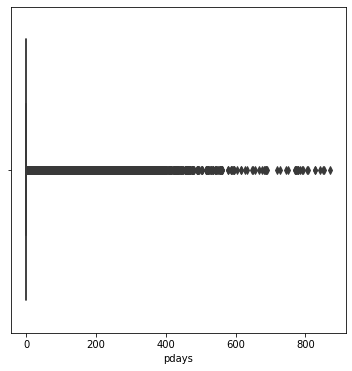

In [41]:
plt.figure(figsize=(6,6))
sns.boxplot(df['pdays'],data=df,palette= 'winter')

In [42]:
import math
mean=math.floor(df['salary'].mean())
print(mean)
median = math.floor(df['salary'].median())
print(median)

57035
60000


In [43]:
df['salary'].describe()

count     43371.000000
mean      57035.000346
std       32104.373847
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

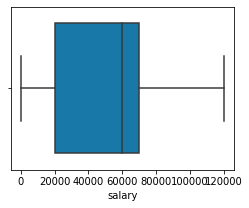

In [45]:
plt.figure(figsize=(4,3))
sns.boxplot(df['salary'],data=df,palette= 'winter')

In [47]:
import math
mean=math.floor(df['age'].mean())
print(mean)


40


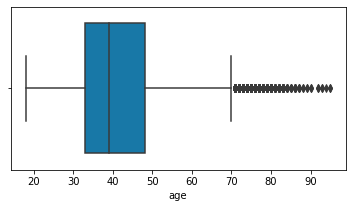

In [49]:
plt.figure(figsize=(6,3))
sns.boxplot(df['age'],data=df,palette= 'winter')

In [51]:
import math
mean=math.floor(df['balance'].mean())
print(mean)

1356


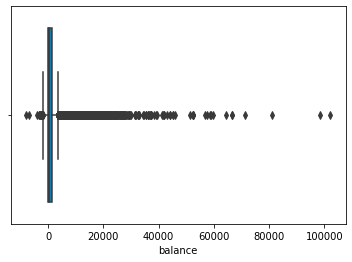

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(df['balance'],data=df,palette= 'winter')

### Make suitable plots for associations with numerical features and categorical features’

In [54]:
plot_color = "#dd0033"
title_color = "#333333"
y_title_margin = 1.0 # The amount of space above titles
left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.5    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.6 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.set_style("whitegrid") 

<Figure size 432x288 with 0 Axes>

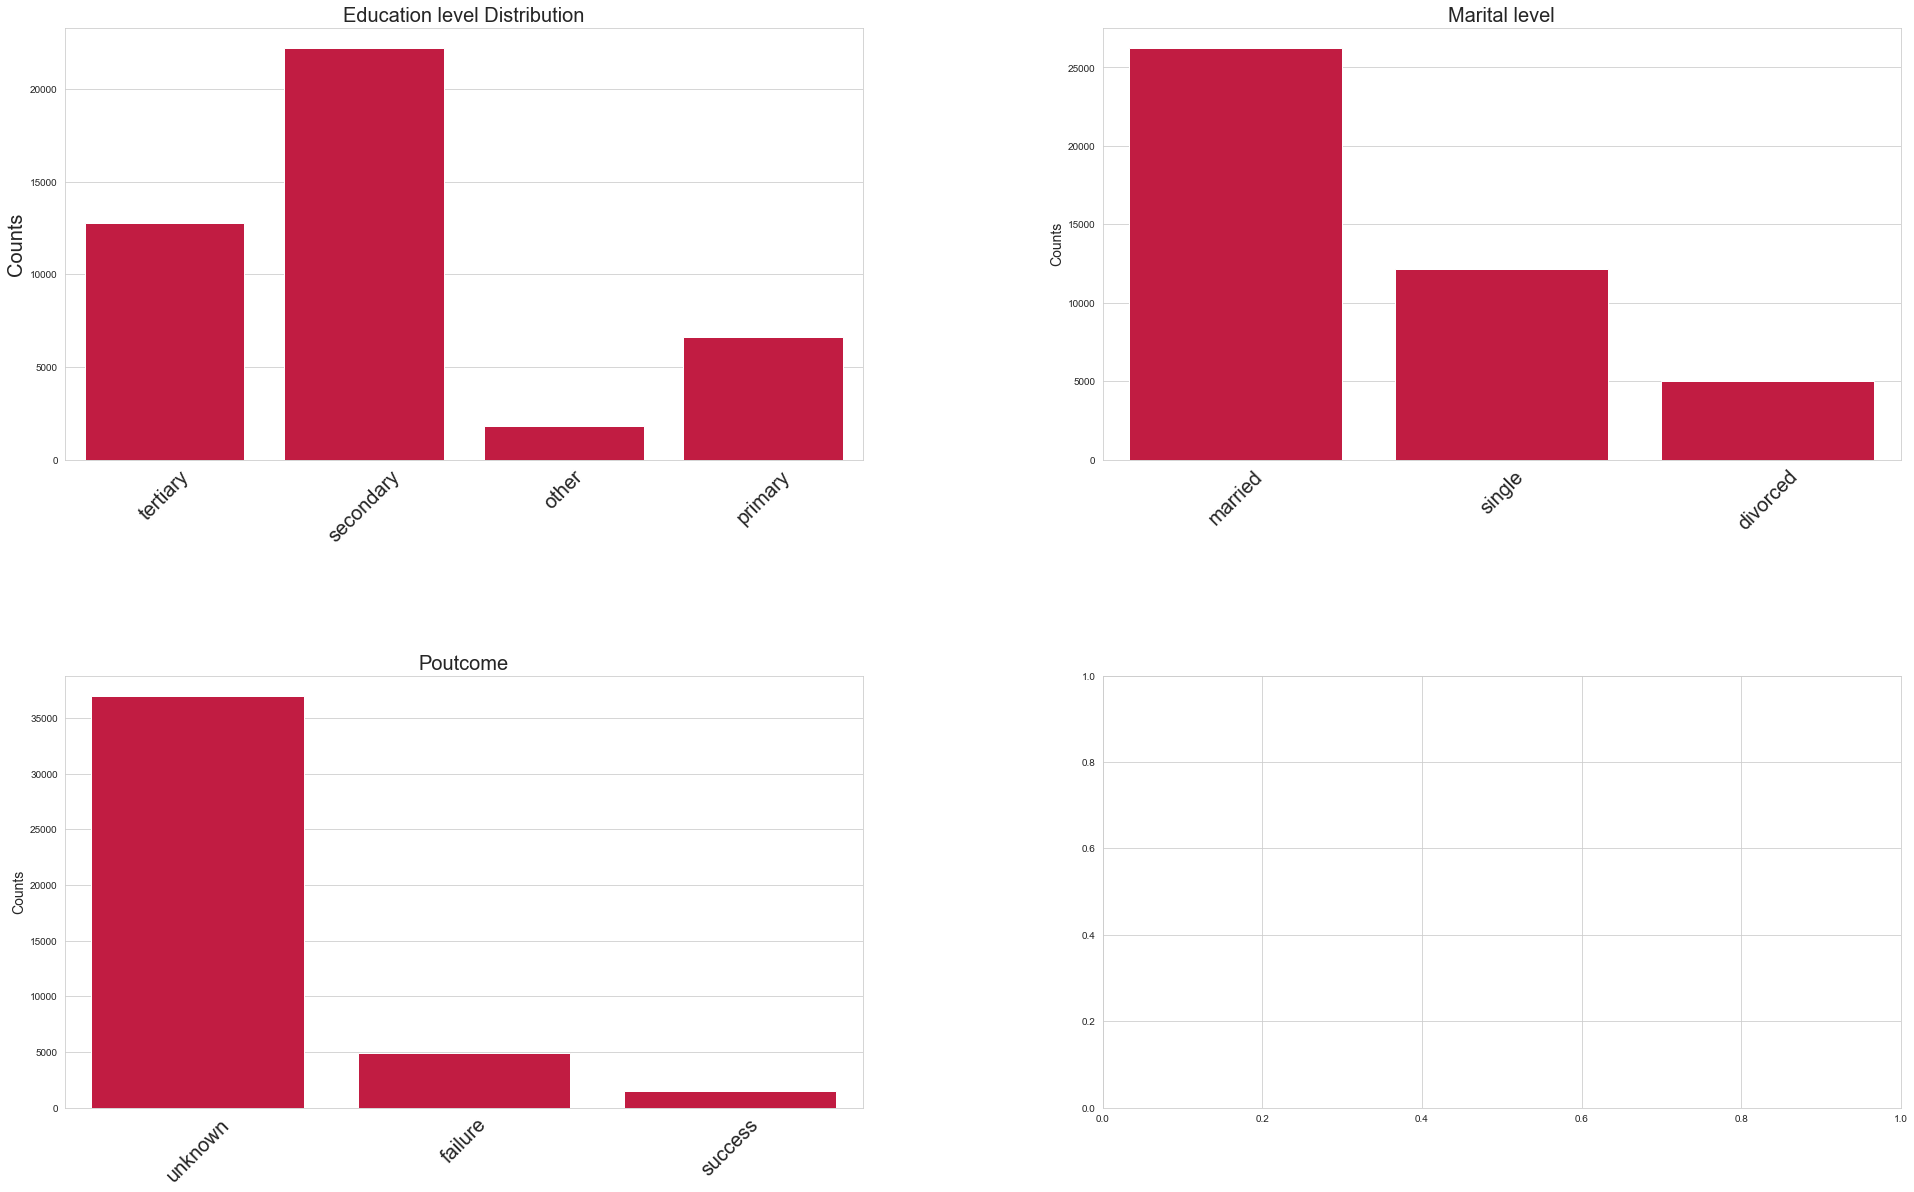

In [55]:
plot_color = "#dd0033"
title_color = "#333333"

fig, ax = plt.subplots(figsize=(30,30), ncols=2, nrows=2)

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  0.6, 
    wspace  =  0.3, 
    hspace  =  0.5
)
fig.patch.set_alpha(0.5)

ax[0][0].set_title('Education level Distribution', fontsize=20)
ax[0][0].set_alpha(0)

edu_dist=sns.countplot(df['education'],color=plot_color, ax=ax[0][0])
edu_dist.set_xticklabels(edu_dist.get_xticklabels(),rotation=45, fontsize=20)
edu_dist.set_xlabel('')
edu_dist.set_ylabel('Counts', fontsize=20)


ax[0][1].set_title('Marital level', fontsize=20)
ax[0][1].set_alpha(0)

mar_dist=sns.countplot(df['marital'],color=plot_color, ax=ax[0][1])
mar_dist.set_xticklabels(mar_dist.get_xticklabels(),rotation=45, fontsize=20)
mar_dist.set_xlabel('')
mar_dist.set_ylabel('Counts', fontsize=14)


ax[1][0].set_title('Poutcome', fontsize=20)
ax[1][0].set_alpha(0)

out_dist=sns.countplot(df['poutcome'],color=plot_color, ax=ax[1][0])
out_dist.set_xticklabels(out_dist.get_xticklabels(),rotation=45, fontsize=20)
out_dist.set_xlabel('')
out_dist.set_ylabel('Counts', fontsize=14)
                    

fig.savefig('03categorical_vars_distribution.png',dpi=fig.dpi,bbox_inches='tight')

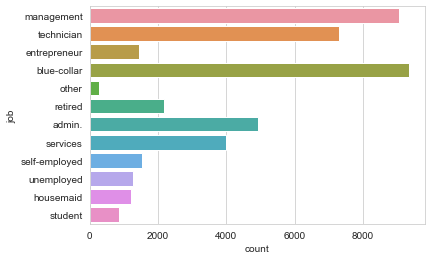

In [56]:
sns.countplot(y='job', data=df)

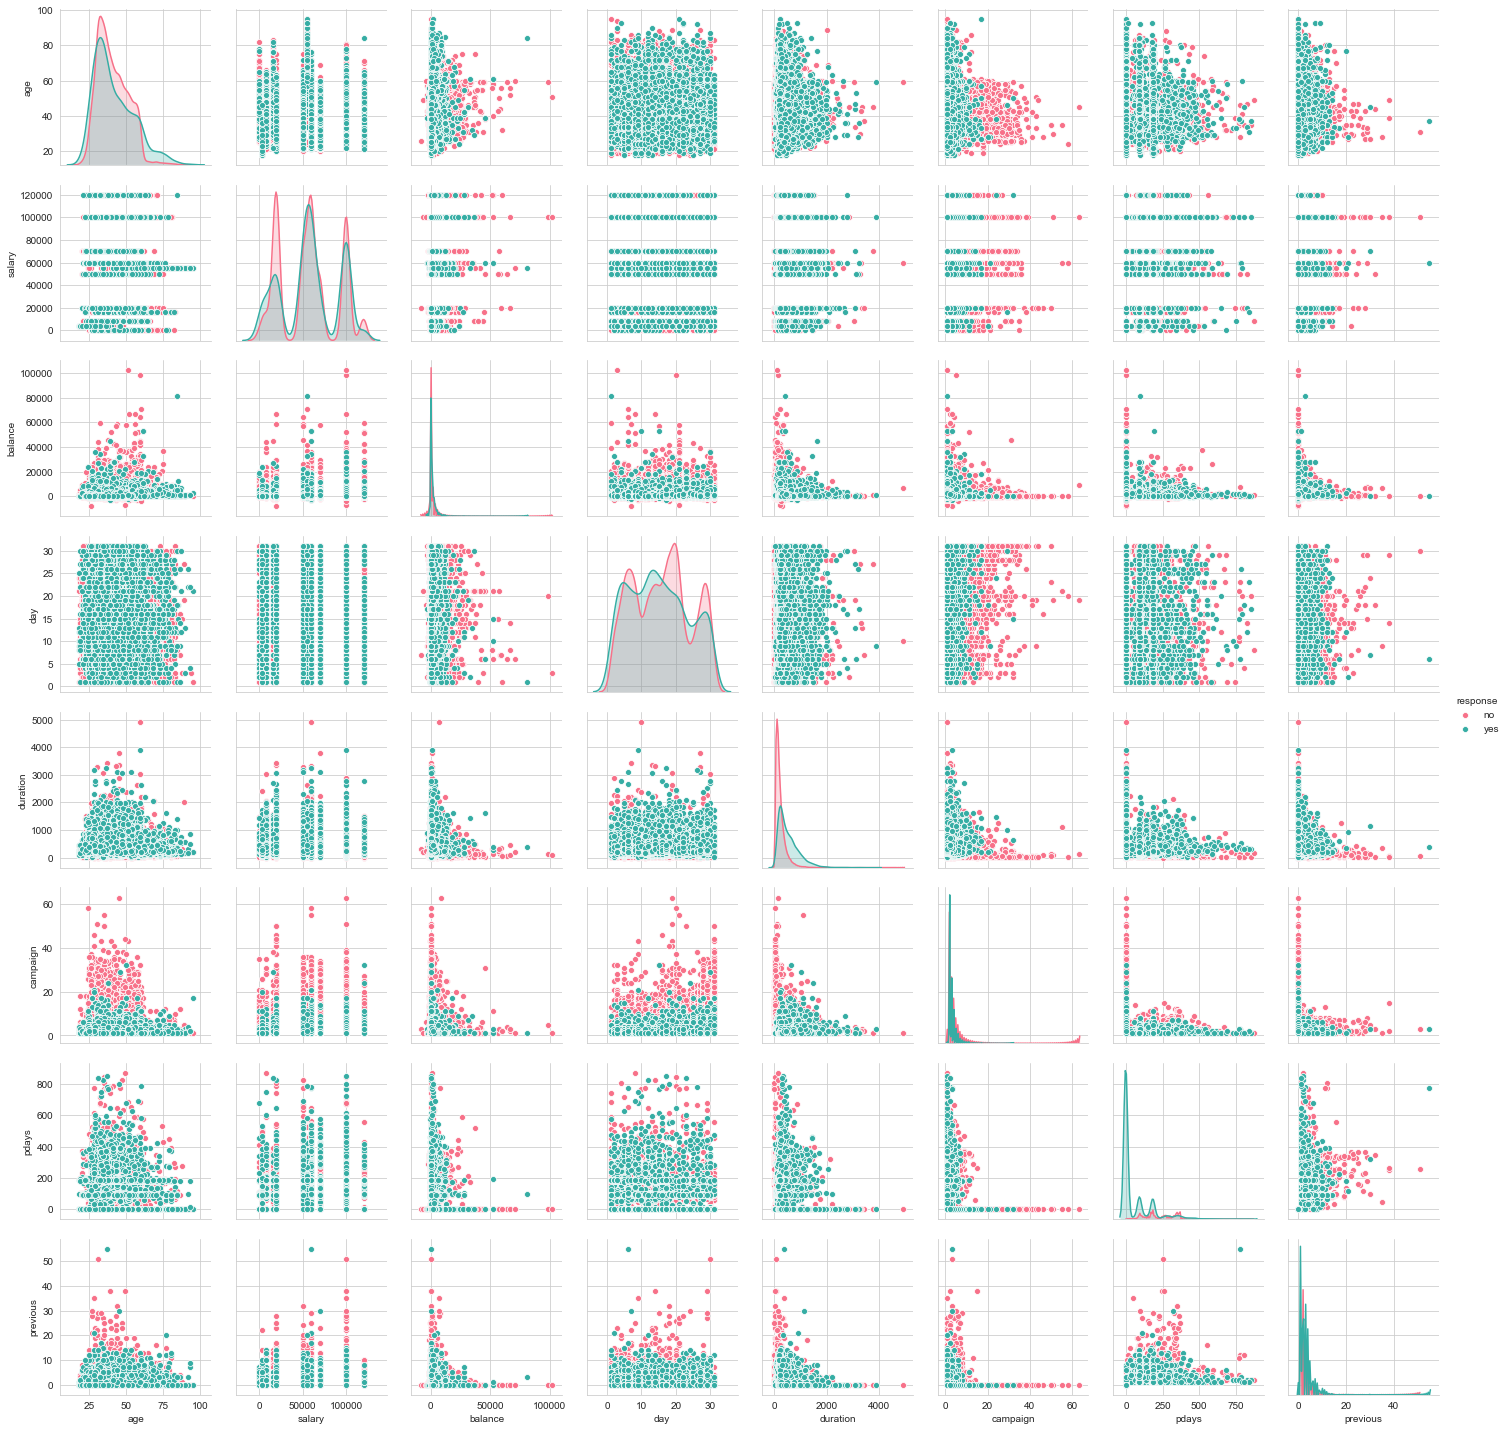

In [57]:
sns.pairplot(df, hue='response', palette="husl")

In [58]:
df_grouped = df.groupby("response")
class_no = "no"
class_yes = "yes"
df_grouped_no = df_grouped.get_group(class_no)
df_grouped_yes =df_grouped.get_group(class_yes)

Text(0, 0.5, 'Count')

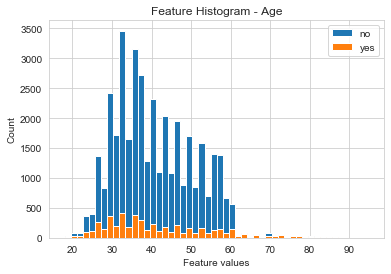

In [59]:
plt.figure()
plt.hist(df_grouped_no['age'], bins=50, label=class_no)
plt.hist(df_grouped_yes['age'], bins=50, label=class_yes)
plt.legend()
plt.title("Feature Histogram - Age")
plt.xlabel("Feature values")
plt.ylabel("Count")

### Convert the response variable to a convenient form

In [60]:
df.response.value_counts()

no     38389
yes     4982
Name: response, dtype: int64

In [61]:
def convert(x):
    return x.map({'no':0,'yes':1})
df[['response']]=df[['response']].apply(convert)

In [62]:
df.response.value_counts()

0    38389
1     4982
Name: response, dtype: int64

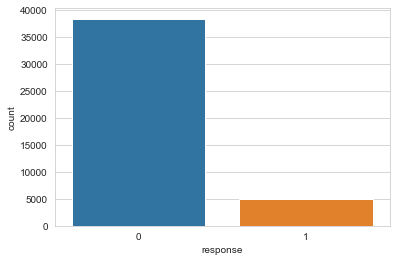

In [63]:
sns.countplot(x = 'response', data = df)

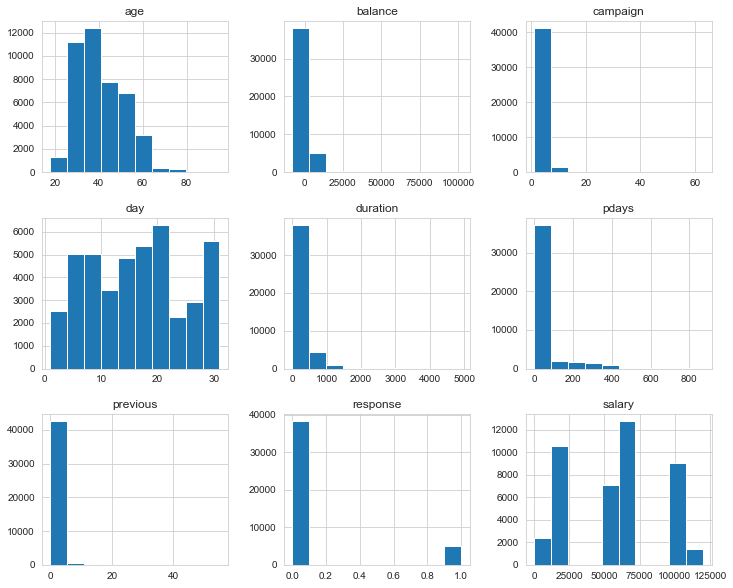

In [64]:
dist=df.hist(figsize=(12,10)) # display numerical feature distribution

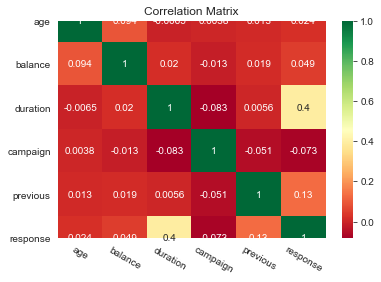

In [65]:
corr_data = df[['age','balance','duration','campaign','month','previous','response']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

##### This reveals a clear relationship among age, balance, duration and campaign.
###### Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning par

In [66]:
df=df.drop('poutcome', axis=1)

In [67]:
lst=['housing','default','loan','targeted']



def conver(x):
    return x.map({'no':0,'yes':1})

for i in lst:
    df[[i]]=df[[i]].apply(conver)

lst=['job','education','marital','month']
for i in lst:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([i],axis=1,inplace=True)


df.head()

### Train Test Split

In [69]:
X=df.drop('response', axis=1)
Y=df['response']

In [70]:
### Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [71]:
# 20% of the data will be used for testing
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

#### Use RFE to select top n features in an automated fashion (choose n as you see fit)¶

In [74]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
df.select_dtypes

<bound method DataFrame.select_dtypes of        age  salary  targeted  default  balance  housing  loan  day  duration  \
0       58  100000         1        0     2143        1     0    5       261   
1       44   60000         1        0       29        1     0    5       151   
2       33  120000         1        0        2        1     1    5        76   
3       47   20000         0        0     1506        1     0    5        92   
4       33       0         0        0        1        0     0    5       198   
...    ...     ...       ...      ...      ...      ...   ...  ...       ...   
45205   25   60000         1        0      505        0     1   17       386   
45206   51   60000         1        0      825        0     0   17       977   
45207   71   55000         1        0     1729        0     0   17       456   
45208   72   55000         1        0     5715        0     0   17      1127   
45209   57   20000         1        0      668        0     0   17       508   

In [83]:
 import sklearn.linear_model as sk
lm =sk. LogisticRegression()
lm.fit(X_train,Y_train)

C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Index(['housing', 'student', 'aug', 'dec', 'jan', 'jul', 'mar', 'may', 'oct',
       'sep'],
      dtype='object')

In [86]:
# Creating  dataframe with RFE selected variables

x_train_rfe = X_train[rfe_]

In [87]:
def build_model(X,y):
    X = sm.add_constant(X) 
    #Ading constant
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) #summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [88]:

x_train_new = build_model(x_train_rfe,Y_train)

C:\Users\Riya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     272.4
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:01:55   Log-Likelihood:                -8173.4
No. Observations:               34696   AIC:                         1.637e+04
Df Residuals:                   34685   BIC:                         1.646e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1598      0.003     45.978      0.0

In [89]:
x_train_rfe

,housing,student,aug,dec,jan,jul,mar,may,oct,sep
4415,1,0,0,0,0,0,0,1,0,0
34121,0,0,0,0,0,0,0,0,0,0
11101,0,0,0,0,0,0,0,0,0,0
37618,1,0,0,0,0,0,0,1,0,0
38455,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
34952,1,0,0,0,0,0,0,1,0,0
13927,1,0,0,0,0,1,0,0,0,0
919,1,0,0,0,0,0,0,1,0,0
39786,0,0,0,0,0,0,0,0,0,0


In [91]:
checkVIF(x_train_new)

,Features,VIF
0,const,4.47
8,may,1.50
1,housing,1.33
3,aug,1.30
6,jul,1.25
5,jan,1.06
9,oct,1.04
7,mar,1.03
10,sep,1.03
2,student,1.01


In [92]:
x_train_new = x_train_new.drop('const',axis=1)

In [93]:
x_train_new = x_train_new.drop('housing',axis=1)

In [94]:
x_train_new = build_model(x_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     270.9
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:03:11   Log-Likelihood:                -8306.5
No. Observations:               34696   AIC:                         1.663e+04
Df Residuals:                   34686   BIC:                         1.672e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1282      0.003     44.227      0.0

C:\Users\Riya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Riya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Riya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Riya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Riya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecat

In [96]:
x_train_new = x_train_new.drop(columns=['jan'])

In [97]:

checkVIF(x_train_new)

,Features,VIF
0,const,2.84
6,may,1.29
4,jul,1.22
2,aug,1.20
7,oct,1.03
5,mar,1.02
8,sep,1.02
1,student,1.01
3,dec,1.01


In [98]:
x_train_new = build_model(x_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     303.5
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:04:04   Log-Likelihood:                -8311.3
No. Observations:               34696   AIC:                         1.664e+04
Df Residuals:                   34687   BIC:                         1.672e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1257      0.003     45.159      0.0

In [99]:
x_train_new = x_train_new.drop('const',axis=1)
checkVIF(x_train_new)

,Features,VIF
2,dec,1.00
7,sep,0.37
4,mar,0.27
0,student,0.23
1,aug,0.02
6,oct,0.02
3,jul,0.01
5,may,0.00


In [101]:
feats=list(x_train_new.columns)

In [104]:
#now  fosk.r selected features we have to form a model and check accuracy
lm_sel = sk.LogisticRegression()
lm_sel.fit(X_train[feats],Y_train)

C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
#### Estimate the model performance using k fold cross validation

In [111]:
auc=[X_train,X_train[feats]]
results_c = []
names_c = []
models = []
models.append(('sk.LogisticRegression', sk.LogisticRegression()))
for i in auc:
        kfold = KFold(n_splits=10, random_state=7)    
        # train the model
        cv_results = cross_val_score(sk.LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')    
        results_c.append(cv_results)
        names_c.append(names_c)
        msg = "%s: %f (%f)" % (sk.LogisticRegression, cv_results.mean(), cv_results.std())
        print(msg)

C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

<class 'sklearn.linear_model.logistic.LogisticRegression'>: 0.890622 (0.006897)


C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Riya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

<class 'sklearn.linear_model.logistic.LogisticRegression'>: 0.885434 (0.005957)


#### By taking all features we have got an accuracy using K fold cross validation as %0.89 and By taking a selectde faetures we got 88%.
#### logistic regression achieved an accuracy of about 88%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.